In [2]:
from wonambi import Dataset
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft
import pandas as pd
import scipy
import sys
sys.path.append('..')

In [5]:
pd.read_csv('/data/anvlfilippova/Institution/Recording 1021009/Courbes 009_scores_sleepstats.csv')

,,,,,,Wonambi v6.17
Variable,Acronym,Unit 1,Value 1,Unit 2,Value 2,Formula
Lights off,LOFF,dd/mm/yyyy HH:MM:SS,02/10/2021 00:20:00,seconds from recording start,2999.0,marker
Lights on,LON,dd/mm/yyyy HH:MM:SS,02/10/2021 08:20:00,seconds from recording start,31799.0,marker
Sleep onset,SO,dd/mm/yyyy HH:MM:SS,02/10/2021 00:46:31,seconds from recording start,4590,first sleep epoch (N1 or N2) - LOFF
Time of last awakening,NaN,dd/mm/yyyy HH:MM:SS,02/10/2021 07:52:01,seconds from recording start,30120,"end time of last epoch of N1, N2, N3 or REM"
Total dark time (Time in bed),TDT (TIB),Epochs,960.0,Minutes,480.0,LON - LOFF
Wake duration,W,Epochs,246.0,Minutes,123.0,total Wake duration between LOFF and LON
Sleep latency,SL,Epochs,53.03333333333333,Minutes,26.516666666666666,LON - SO
Wake after sleep onset,WASO,Epochs,138.0,Minutes,69.0,W - SL
"Wake, morning",Wmor,Epochs,55.96666666666667,Minutes,27.983333333333334,total W-SL-WASO


In [22]:
d = data.read_data()
headers = data.header['chan_name']
headers

['F4',
 'F3',
 'C4',
 'C3',
 'O2',
 'O1',
 'M2',
 'M1',
 'E2',
 'E1',
 'ChinR',
 'ChinL',
 'piezo1',
 'piezo2',
 'piezo3',
 'piezo4',
 'piezo5',
 'piezoB',
 'piezoA',
 'piezoEF',
 'piezoDC',
 'EMG_J D',
 'EMG J G',
 'ECG',
 'Thorax',
 'Abdomen',
 'NasalPressure',
 'Plethysmogram',
 'Sp02']

In [23]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = scipy.signal.filtfilt(b, a, data)
    return y

In [45]:
chan_target = 19
chan_p = 13
start_sensors = 2000
stop_sensors = 10000

In [ ]:
headers

In [46]:
target = d.data[0][chan_target][start_sensors:stop_sensors+256*30]
p = d.data[0][chan_p][start_sensors:stop_sensors+256*30]

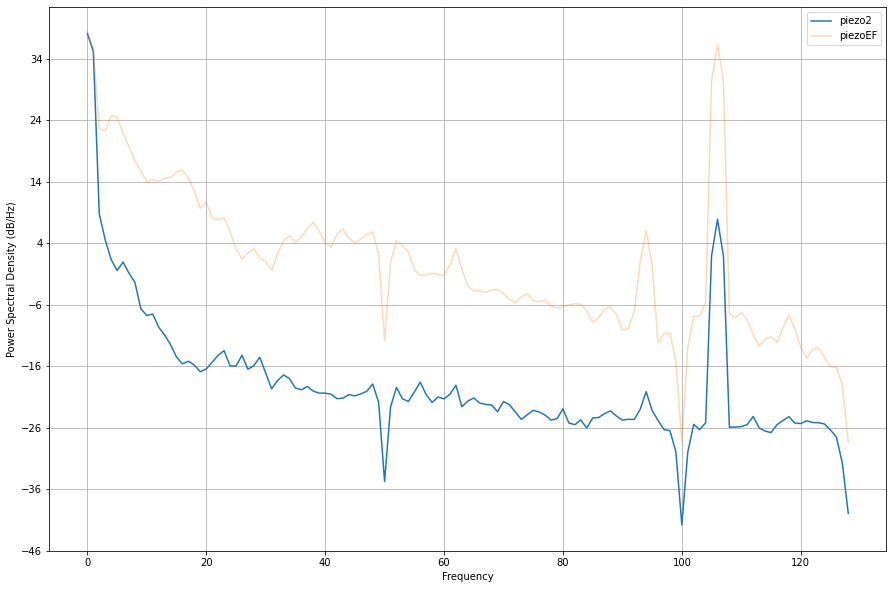

In [47]:
plt.figure(figsize=(15,10))
plt.psd(d.data[0][chan_p][start_sensors:stop_sensors], 
         label = headers[chan_p], Fs=256)
plt.psd(d.data[0][chan_target][start_sensors:stop_sensors], 
         alpha=0.3, label = headers[chan_target], Fs=256)
plt.legend()
plt.show()


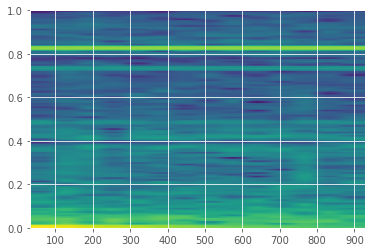

In [214]:
plt.specgram(data.data[0][chan_p][start_sensors:stop_sensors], 
         label = names[chan_p])
plt.show()

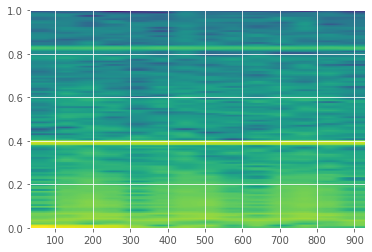

In [204]:
plt.specgram(data.data[0][chan_target][start_sensors:stop_sensors],
             label = names[chan_target])
plt.show()